In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [9]:
# f(x) used to generate dataset
def f(x):
    return x**50 + 49*x**35 + np.exp(x*x) - np.sin(x)

In [10]:
# TODO: complete this function to compute Root Mean Squared Error
def RMSE(y_actual, y_predicted):
    rmse = np.sqrt(np.mean((y_actual - y_predicted)**2))
    return rmse

# Direct Method

## Direct Method: Compute Coefficients

In [11]:
# TODO: implement Direct (Matrix) method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_direct(x, y):
    n = len(x)
    A = np.vander(x, increasing=True)
    coeffs = np.linalg.solve(A, y)
    return coeffs

## Direct Method: Evaluate Polynomial

In [12]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# xx is the list of input numbers
# yy is the list of interpolated values computed
def poly_evaluation_direct(xx, coeffs):
    yy = np.polyval(coeffs, xx)
    return yy

## Direct Method: Testing

RMSE: 1766.0573296739324


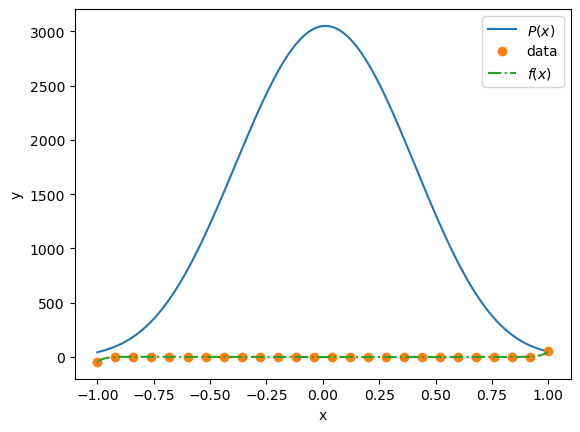

In [13]:
import numpy as np
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)  # Increase the number of data points to 26
y = f(x)
a = poly_coeffs_direct(x, y)
yz = poly_evaluation_direct(z, a)
print('RMSE:', RMSE(f(z), yz))

plt.plot(z, yz, '-')
plt.plot(x, y, 'o')
plt.plot(z, f(z), '-.')
plt.legend(["$P(x)$", "data", "$f(x)$"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

RMSE: 1766.0573296739324


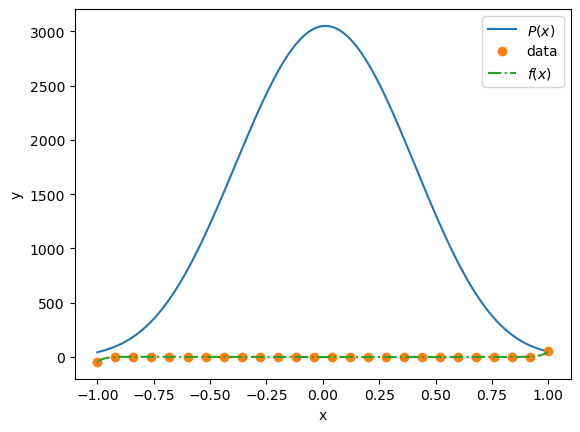

In [17]:
# TODO: Generate the plot for a polynomial of order 25.
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)  # Increase the number of data points to 26
y = f(x)

a = poly_coeffs_direct(x, y)

# Evaluate the polynomial at z
yz = poly_evaluation_direct(z, a)

print('RMSE:', RMSE(f(z), yz))

plt.plot(z, yz, '-')
plt.plot(x, y, 'o')
plt.plot(z, f(z), '-.')
plt.legend(["$P(x)$", "data", "$f(x)$"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Newton Method: Compute Coefficients

In [14]:
# TODO: implement Newton Divided Difference method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_newton(x, y):
    n = len(x)
    coeffs = y.copy()
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coeffs[i] = (coeffs[i] - coeffs[i - 1]) / (x[i] - x[i - j])
    return coeffs

## Newton Method: Evaluate Polynomial

In [15]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# z is the list of input numbers
# y is the list of interpolated values computed which will be returned
def poly_evaluation_newton(a, x, z):
    n = len(x)
    y = np.zeros_like(z)
    for j in range(n):
        term = a[j]
        for k in range(j):
            term *= (z - x[k])
        y += term
    return y

## Newton Method: Testing

RMSE: 0.030072693410557776


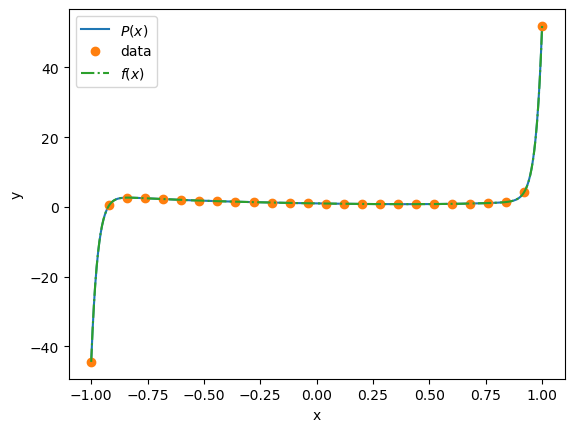

In [16]:
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)  # Increase the number of data points to 26
y = f(x)
a = poly_coeffs_newton(x, y)
yz = poly_evaluation_newton(a, x, z)
print('RMSE:', RMSE(f(z), yz))

plt.plot(z, yz, '-')
plt.plot(x, y, 'o')
plt.plot(z, f(z), '-.')
plt.legend(["$P(x)$", "data", "$f(x)$"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

RMSE: 0.030072693410557776


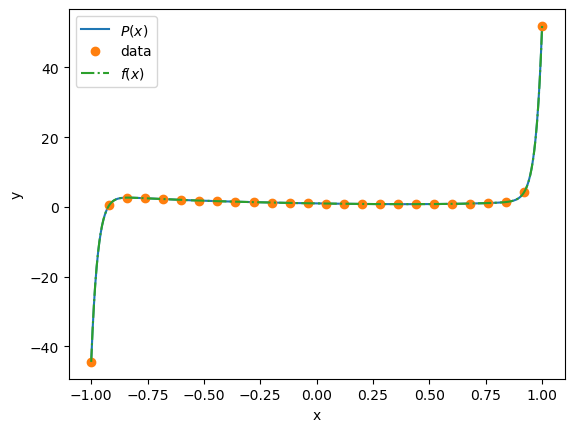

In [18]:
# TODO: Generate the plot for a polynomial of order 25.
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)  # Increase the number of data points to 26
y = f(x)

a = poly_coeffs_newton(x, y)

# Evaluate the polynomial at z
yz = poly_evaluation_newton(a, x, z)

print('RMSE:', RMSE(f(z), yz))

plt.plot(z, yz, '-')
plt.plot(x, y, 'o')
plt.plot(z, f(z), '-.')
plt.legend(["$P(x)$", "data", "$f(x)$"])
plt.xlabel('x')
plt.ylabel('y')
plt.show()